<a href="https://colab.research.google.com/github/Deepikagh97/Telecom-Churn-Analysis/blob/main/DN___Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom churn Analysis**

Deepika Nayak

#**Problem Statement**
Telecom Churn Analysis Telecom Churn (loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to retain their existing customers. Most telecom companies suffer from voluntary churn.

Customer churn is when a customers stop using the service from a company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.


Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

#**About Data**

Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.





In [ ]:
# import all librariers
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
sns.set_color_codes = True
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# figure size in inches
rcParams['figure.figsize'] = 10,8

### **Read and view data**

In [ ]:
# Read the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Telecom Churn.csv")

Saving Telecom Churn.csv to Telecom Churn (1).csv


In [ ]:
#Glimpse of Data
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

These are the first 5 rows of the telecom churn analysis dataset.

In [ ]:
df.tail()

State  Account length  Area code International plan Voice mail plan  \
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332                13.7                 4               3.70   

      Customer service calls  Churn  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False

These are the last 5 rows of the telecom churn analysis dataset.

In [ ]:
print('The number of rows are',df.shape[0],'\n''The number of columns are',df.shape[1])

The number of rows are 3333 
The number of columns are 20


In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

###**Variable Breakdown**

**STATE:** 51 Unique States in United States of America

**Account Length:** Length of The Account

**Area Code:** 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland

**International Plan:** Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes:** Total Number of Minutes Spent By Customers in Morning

**Total day calls:** Total Number of Calls made by Customer in Morning.

**Total day charge:**  Total Charge to the Customers in Morning.

**Total eve minutes:** Total Number of Minutes Spent By Customers in Evening

**Total eve calls:** Total Number of Calls made by Customer in Evening.

**Total eve charge:** Total Charge to the Customers in Morning.

**Total night minutes:** Total Number of Minutes Spent By Customers in the Night.

**Total night calls:** Total Number of Calls made by Customer in Night.

**Total night charge:** Total Charge to the Customers in Night.

###**Fixing messy column names (containing spaces) for ease of use**

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

Space in the columns are replaced by "_" as it might cause some problems in some of the functions while executing.

####**Checking information about the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
quantitative_columns = df.select_dtypes(include=['int', 'float']).columns


numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the lists of numerical and categorical columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Account_length', 'Area_code', 'Number_vmail_messages', 'Total_day_minutes', 'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes', 'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls']
Categorical Columns: ['State', 'International_plan', 'Voice_mail_plan', 'Churn']


- There are no Null values / missing values in the dataset.

- There are 16 numerical columns in the dataset.

- There are 4 categorical columns in the dataset.

- Column: Area_code should also be a categorical variable, it needs to be converted to categorical type.

In [ ]:
df['Churn'] = df['Churn'].replace({True: 'True', False: 'False'})

In [ ]:
df['Area_code'] = df['Area_code'].astype('object')

#####**Now, let us check the basic measures of descriptive statistics for the continuous variables**

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include = 'all').T

count unique    top    freq   mean   std   min  \
State                     3333     51     WV     106    NaN   NaN   NaN   
Account_length         3333.00    NaN    NaN     NaN 101.06 39.82  1.00   
Area_code              3333.00   3.00 415.00 1655.00    NaN   NaN   NaN   
International_plan        3333      2     No    3010    NaN   NaN   NaN   
Voice_mail_plan           3333      2     No    2411    NaN   NaN   NaN   
Number_vmail_messages  3333.00    NaN    NaN     NaN   8.10 13.69  0.00   
Total_day_minutes      3333.00    NaN    NaN     NaN 179.78 54.47  0.00   
Total_day_calls        3333.00    NaN    NaN     NaN 100.44 20.07  0.00   
Total_day_charge       3333.00    NaN    NaN     NaN  30.56  9.26  0.00   
Total_eve_minutes      3333.00    NaN    NaN     NaN 200.98 50.71  0.00   
Total_eve_calls        3333.00    NaN    NaN     NaN 100.11 19.92  0.00   
Total_eve_charge       3333.00    NaN    NaN     NaN  17.08  4.31  0.00   
Total_night_minutes    3333.00    NaN    NaN     NaN 200.87 50.57 23.20   
Total_night_calls      3333.00    NaN    NaN     NaN 100.11 19.57 33.00   
Total_night_charge     3333.00    NaN    NaN     NaN   9.04  2.28  1.04   
Total_intl_minutes     3333.00    NaN    NaN     NaN  10.24  2.79  0.00   
Total_intl_calls       3333.00    NaN    NaN     NaN   4.48  2.46  0.00   
Total_intl_charge      3333.00    NaN    NaN     NaN   2.76  0.75  0.00   
Customer_service_calls 3333.00    NaN    NaN     NaN   1.56  1.32  0.00   
Churn                     3333      2  False    2850    NaN   NaN   NaN   

                          25%    50%    75%    max  
State                     NaN    NaN    NaN    NaN  
Account_length          74.00 101.00 127.00 243.00  
Area_code                 NaN    NaN    NaN    NaN  
International_plan        NaN    NaN    NaN    NaN  
Voice_mail_plan           NaN    NaN    NaN    NaN  
Number_vmail_messages    0.00   0.00  20.00  51.00  
Total_day_minutes      143.70 179.40 216.40 350.80  
Total_day_calls         87.00 101.00 114.00 165.00  
Total_day_charge        24.43  30.50  36.79  59.64  
Total_eve_minutes      166.60 201.40 235.30 363.70  
Total_eve_calls         87.00 100.00 114.00 170.00  
Total_eve_charge        14.16  17.12  20.00  30.91  
Total_night_minutes    167.00 201.20 235.30 395.00  
Total_night_calls       87.00 100.00 113.00 175.00  
Total_night_charge       7.52   9.05  10.59  17.77  
Total_intl_minutes       8.50  10.30  12.10  20.00  
Total_intl_calls         3.00   4.00   6.00  20.00  
Total_intl_charge        2.30   2.78   3.27   5.40  
Customer_service_calls   1.00   1.00   2.00   9.00  
Churn                     NaN    NaN    NaN    NaN

- The average 'Number vmail messages' is 8.10. Around 50% of customers didn't used vmail messages.

- The average 'Total day minutes' is 179.78, 'Total eve minutes' is 200.98, 'Total night minutes' is 200.87, 'Total intl minutes' is 10.24. Avarage of Total eve minutes is more than total day minute, total night minute, and total intl minute.

- The average 'Total day calls' is 100.44, 'Total eve calls' is 100.11,'Total night calls' is 100.11, 'Total intl calls' is 4.48. Avarage of Total day calls is more than total eve calls, total night calls, and total intl calls.

- The average 'Total day charge' is 30.56, 'Total eve charge' is 17.08, 'Total night charge' is 9.04,'Total intl charge' is 2.76. Avarage of Total day charge is more than total eve charge, total night charge, and total intl charge.

- The average 'Customer service calls' is 1.56. 50% of people only made one customer service call.

- There are 51 states.

- The average account length is 101.06 days.

In [ ]:
print(df.isnull().sum())

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64


There are no null values present in the dataset.

In [ ]:
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


There are no duplicate values available in the dataset.

In [ ]:
#missing values
df.isna().sum()

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

There are no missing value in the dataset.

In [ ]:
df.nunique()

State                       51
Account_length             212
Area_code                    3
International_plan           2
Voice_mail_plan              2
Number_vmail_messages       46
Total_day_minutes         1667
Total_day_calls            119
Total_day_charge          1667
Total_eve_minutes         1611
Total_eve_calls            123
Total_eve_charge          1440
Total_night_minutes       1591
Total_night_calls          120
Total_night_charge         933
Total_intl_minutes         162
Total_intl_calls            21
Total_intl_charge          162
Customer_service_calls      10
Churn                        2
dtype: int64

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATE :  51
State
CA     34
IA     44
PA     45
LA     51
AK     52
TN     53
HI     53
DC     54
GA     54
AR     55
NH     56
IL     58
KY     59
SC     60
SD     60
DE     61
OK     61
NE     61
ND     62
ME     62
NM     62
MO     63
FL     63
AZ     64
MS     65
MA     65
RI     65
WA     66
NV     66
CO     66
MT     68
NJ     68
NC     68
KS     70
MD     70
IN     71
UT     72
TX     72
MI     73
ID     73
VT     73
CT     74
VA     77
WY     77
OR     78
OH     78
WI     78
AL     80
NY     83
MN     84
WV    106
Name: count, dtype: int64


AREA_CODE :  3
Area_code
408     838
510     840
415    1655
Name: count, dtype: int64


INTERNATIONAL_PLAN :  2
International_plan
Yes     323
No     3010
Name: count, dtype: int64


VOICE_MAIL_PLAN :  2
Voice_mail_plan
Yes     922
No     2411
Name: count, dtype: int64


CHURN :  2
Churn
True      483
False    2850
Name: count, dtype: int64




In almost every states the customers are equally distributed, only in 'WV' state customers are more. The dataset provided has 3 unique area, out of which 415 area has more customers. Less number of customers have taken international and voice mail plan.

3010 people didn't take international plan. 2411 people didn't take voice mail plan. 2850 did not churned.

Text(0.5, 1.02, 'Total Churn Count')

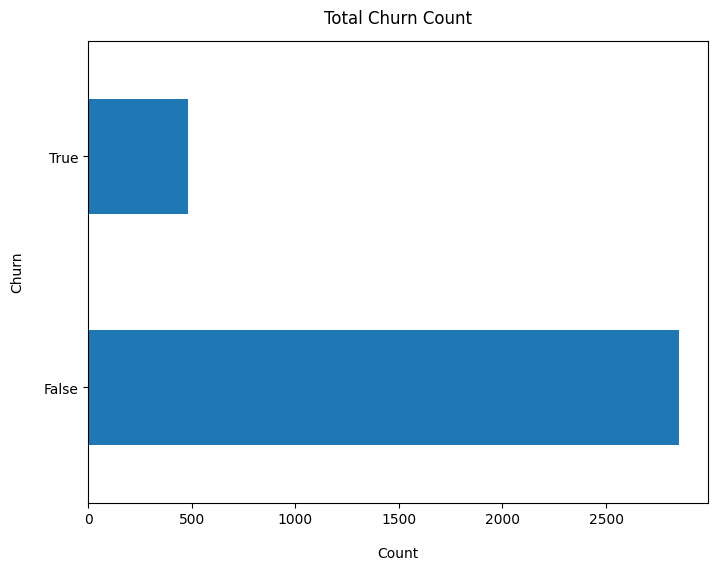

In [ ]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churn", labelpad=14)
plt.title("Total Churn Count", y=1.02)

In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
False   85.51
True    14.49
Name: count, dtype: float64

In [ ]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

Around 14.49%  which is of 483 people has churned.

In [ ]:
df["Total_calls"] =df["Total_day_calls"] + df["Total_eve_calls"] + df["Total_night_calls"] + df["Total_intl_calls"]

In [ ]:
df["Total_charge"] =df["Total_day_charge"] + df["Total_eve_charge"] + df["Total_night_charge"] + df["Total_intl_charge"]

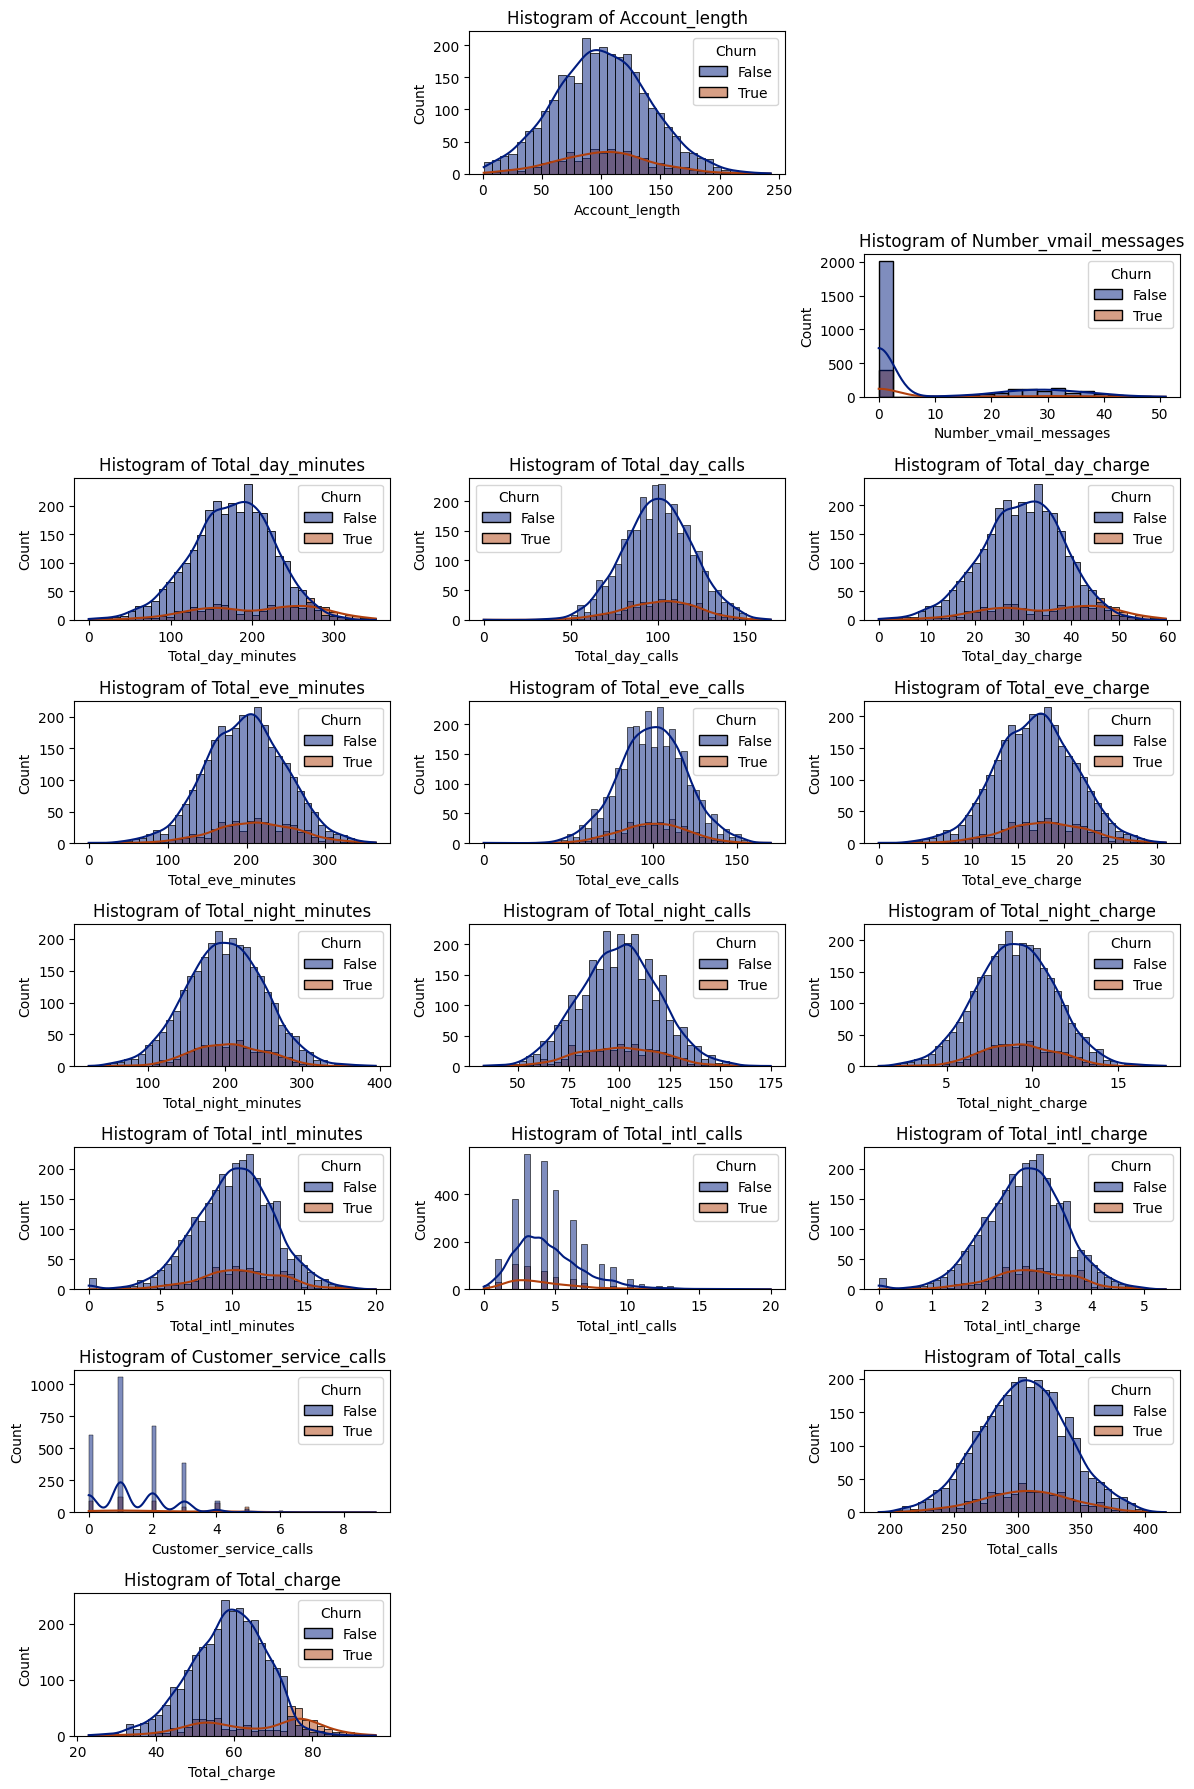

In [ ]:
plt.figure(figsize = (12,18))
feature_list = df.columns
for i in range(len(feature_list)):
    if df[feature_list[i]].dtype !='object':
        plt.subplot(8, 3, i + 1)
        sns.histplot(x = df[feature_list[i]], data = df, kde = True, hue = 'Churn', palette = "dark")
        plt.title('Histogram of {}'.format(feature_list[i]))
        plt.tight_layout()

The insights from the above histo plots are total day charge, tatal night minutes, total night calls, tatal intl minutes, total intl charges and total charge data are normally distributed.

Account length, number of vmail message, Total night charges, Total intl calls data are right skewed.

Total day minutes, total day calls, tatal eve minutes, total eve calls, total eve charges, total calls data are left skewed.

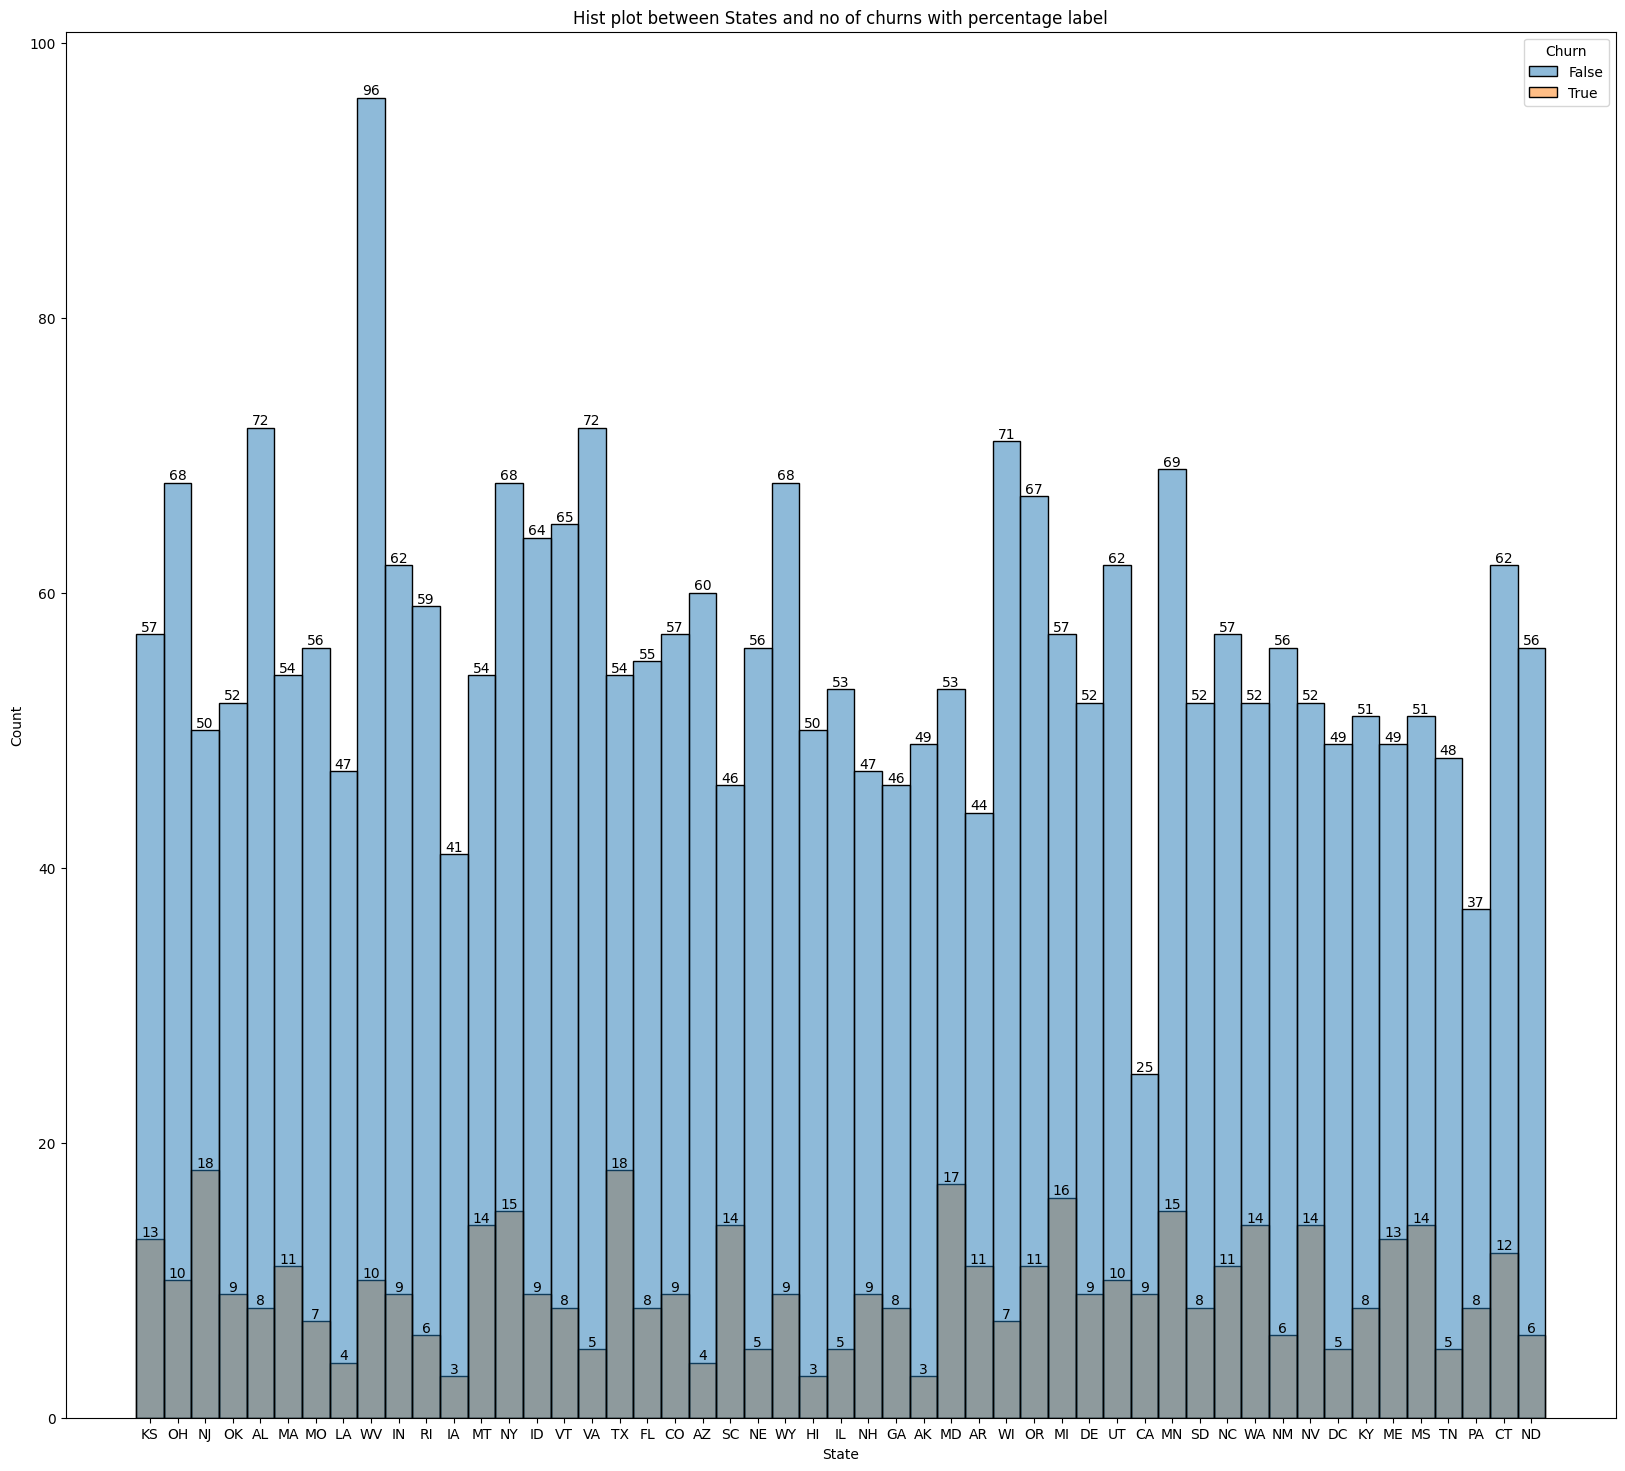

In [ ]:
plt.figure(figsize=(20,18))
ax = sns.histplot(data=df, x="State", hue="Churn")
plt.title("Hist plot between States and no of churns with percentage label")
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
# Group by state and churn
grouped = df.groupby(["State", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with state as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="State", columns="Churn", values="count")

table["State"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each state
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True State  False_%  True_%
31        50    18    NJ     0.74    0.26
4         25     9    CA     0.74    0.26
43        54    18    TX     0.75    0.25
20        53    17    MD     0.76    0.24
40        46    14    SC     0.77    0.23
22        57    16    MI     0.78    0.22
25        51    14    MS     0.78    0.22
33        52    14    NV     0.79    0.21
47        52    14    WA     0.79    0.21
21        49    13    ME     0.79    0.21
26        54    14    MT     0.79    0.21
2         44    11    AR     0.80    0.20
16        57    13    KS     0.81    0.19
34        68    15    NY     0.82    0.18
23        69    15    MN     0.82    0.18
38        37     8    PA     0.82    0.18
19        54    11    MA     0.83    0.17
6         62    12    CT     0.84    0.16
27        57    11    NC     0.84    0.16
30        47     9    NH     0.84    0.16
10        46     8    GA     0.85    0.15
8         52     9    DE     0.85    0.15
36        52     9    OK     0.85 

State **'NJ'**, **'CA'** has highest churn rate of 26% and State **'HI', 'AK', 'AZ', 'VA'** has lowest churn rate of 0.06%.

In [ ]:
#binning the account_length variable in to 4 bins
df['AC_Len_grp'] = pd.cut(df['Account_length'], 4, labels = ['0','60', '150', '250'])

display("AC_Len_grp:", df.AC_Len_grp.unique())

display(df['AC_Len_grp'])

'AC_Len_grp:'

['150', '60', '0', '250']
Categories (4, object): ['0' < '60' < '150' < '250']

0       150
1        60
2       150
3        60
4        60
       ... 
3328    250
3329     60
3330      0
3331    250
3332     60
Name: AC_Len_grp, Length: 3333, dtype: category
Categories (4, object): ['0' < '60' < '150' < '250']

The account length is grouped into 4 catogories. between 0 to 60 means they are the new customers. 250 means they are the oldest customers.

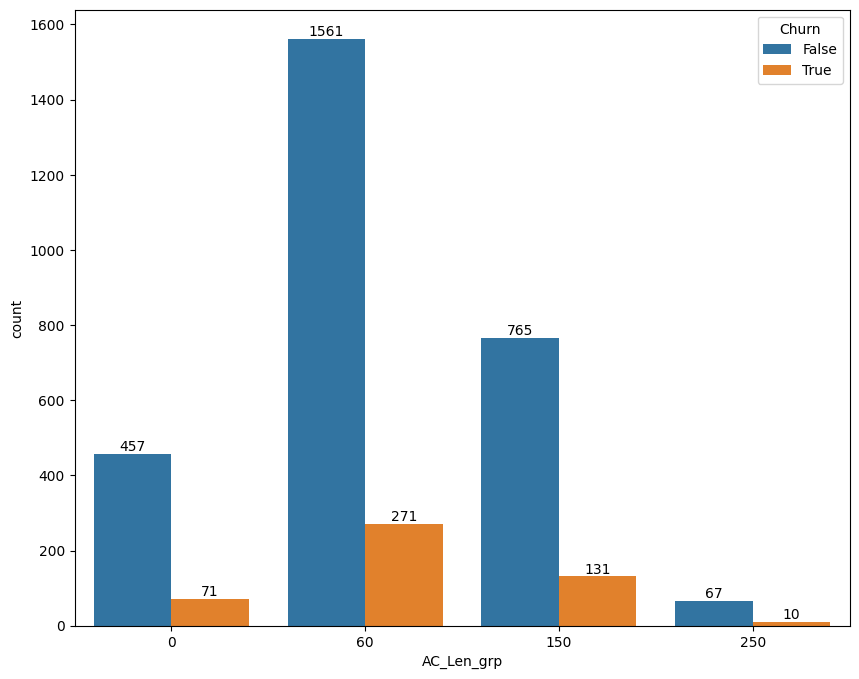

In [ ]:
ax = sns.countplot(df, x = 'AC_Len_grp', hue= 'Churn');
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
# Group by AC_Len_grp and churn
grouped = df.groupby(["AC_Len_grp", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with AC_Len_grp as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="AC_Len_grp", columns="Churn", values="count")

table["AC_Len_grp"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each AC_Len_grp
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True AC_Len_grp  False_%  True_%
1       1561   271         60     0.85    0.15
2        765   131        150     0.85    0.15
0        457    71          0     0.87    0.13
3         67    10        250     0.87    0.13


According to account len group there are not much variation in churn rate.

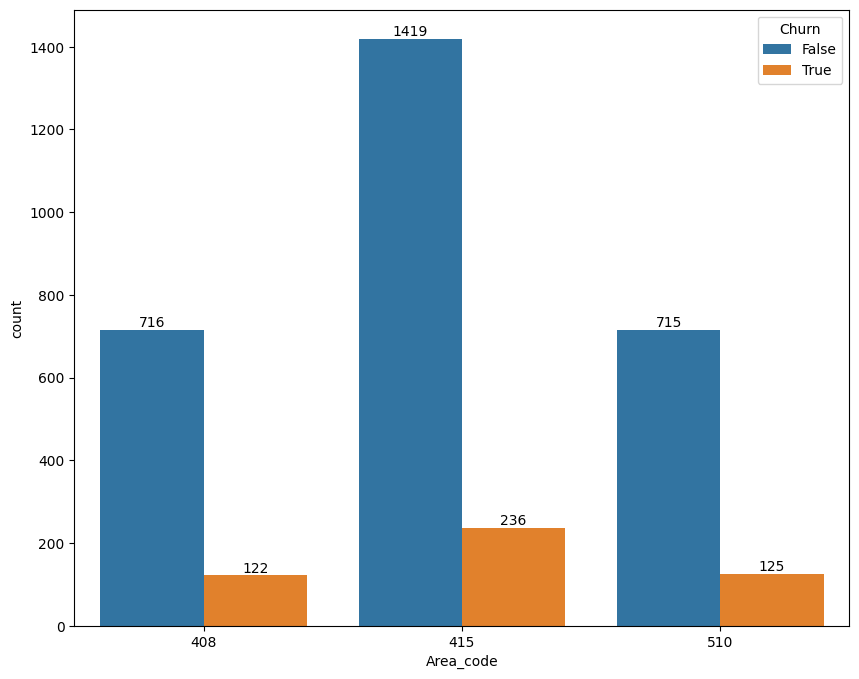

In [ ]:
ax = sns.countplot(df, x = 'Area_code', hue= 'Churn');
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
# Group by Area_code and churn
grouped = df.groupby(["Area_code", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with Area_code as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="Area_code", columns="Churn", values="count")

table["Area_code"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each Area_code
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True  Area_code  False_%  True_%
2        715   125        510     0.85    0.15
0        716   122        408     0.85    0.15
1       1419   236        415     0.86    0.14


The churn rate percentage is almost same according to the area code.

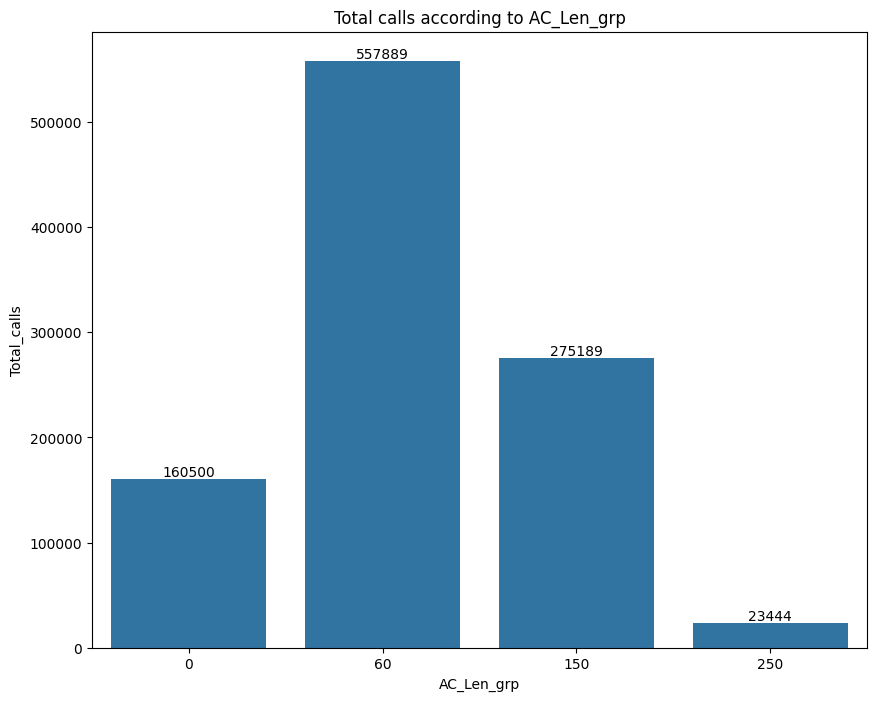

In [ ]:
az = sns.barplot(x="AC_Len_grp", y="Total_calls", estimator = np.sum, ci=None, data=df)
plt.title('Total calls according to AC_Len_grp');
az.bar_label(az.containers[0], fmt = '%d');

In the ac_len_grp 60 the calls are made higher, next is 150 ac_len_grp, third is 0 ac_len_grp and fourth is 250 ac_len_grp. Which means the oldest customer made the least calls.

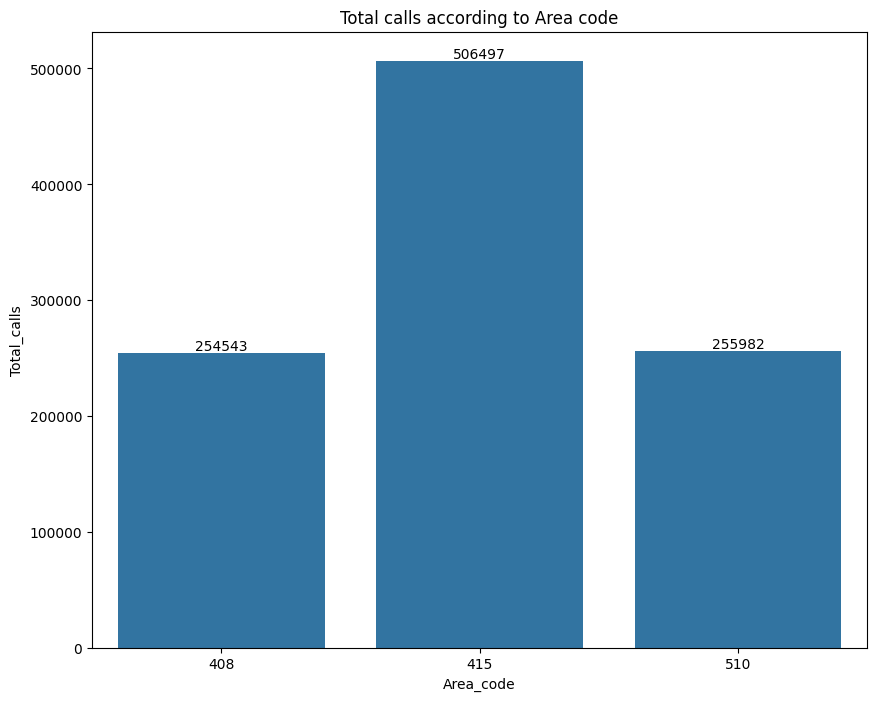

In [ ]:
az = sns.barplot(x="Area_code", y="Total_calls", estimator = np.sum, ci=None, data=df)
plt.title('Total calls according to Area code');
az.bar_label(az.containers[0], fmt = '%d');

In the area code 415 most calls are made.

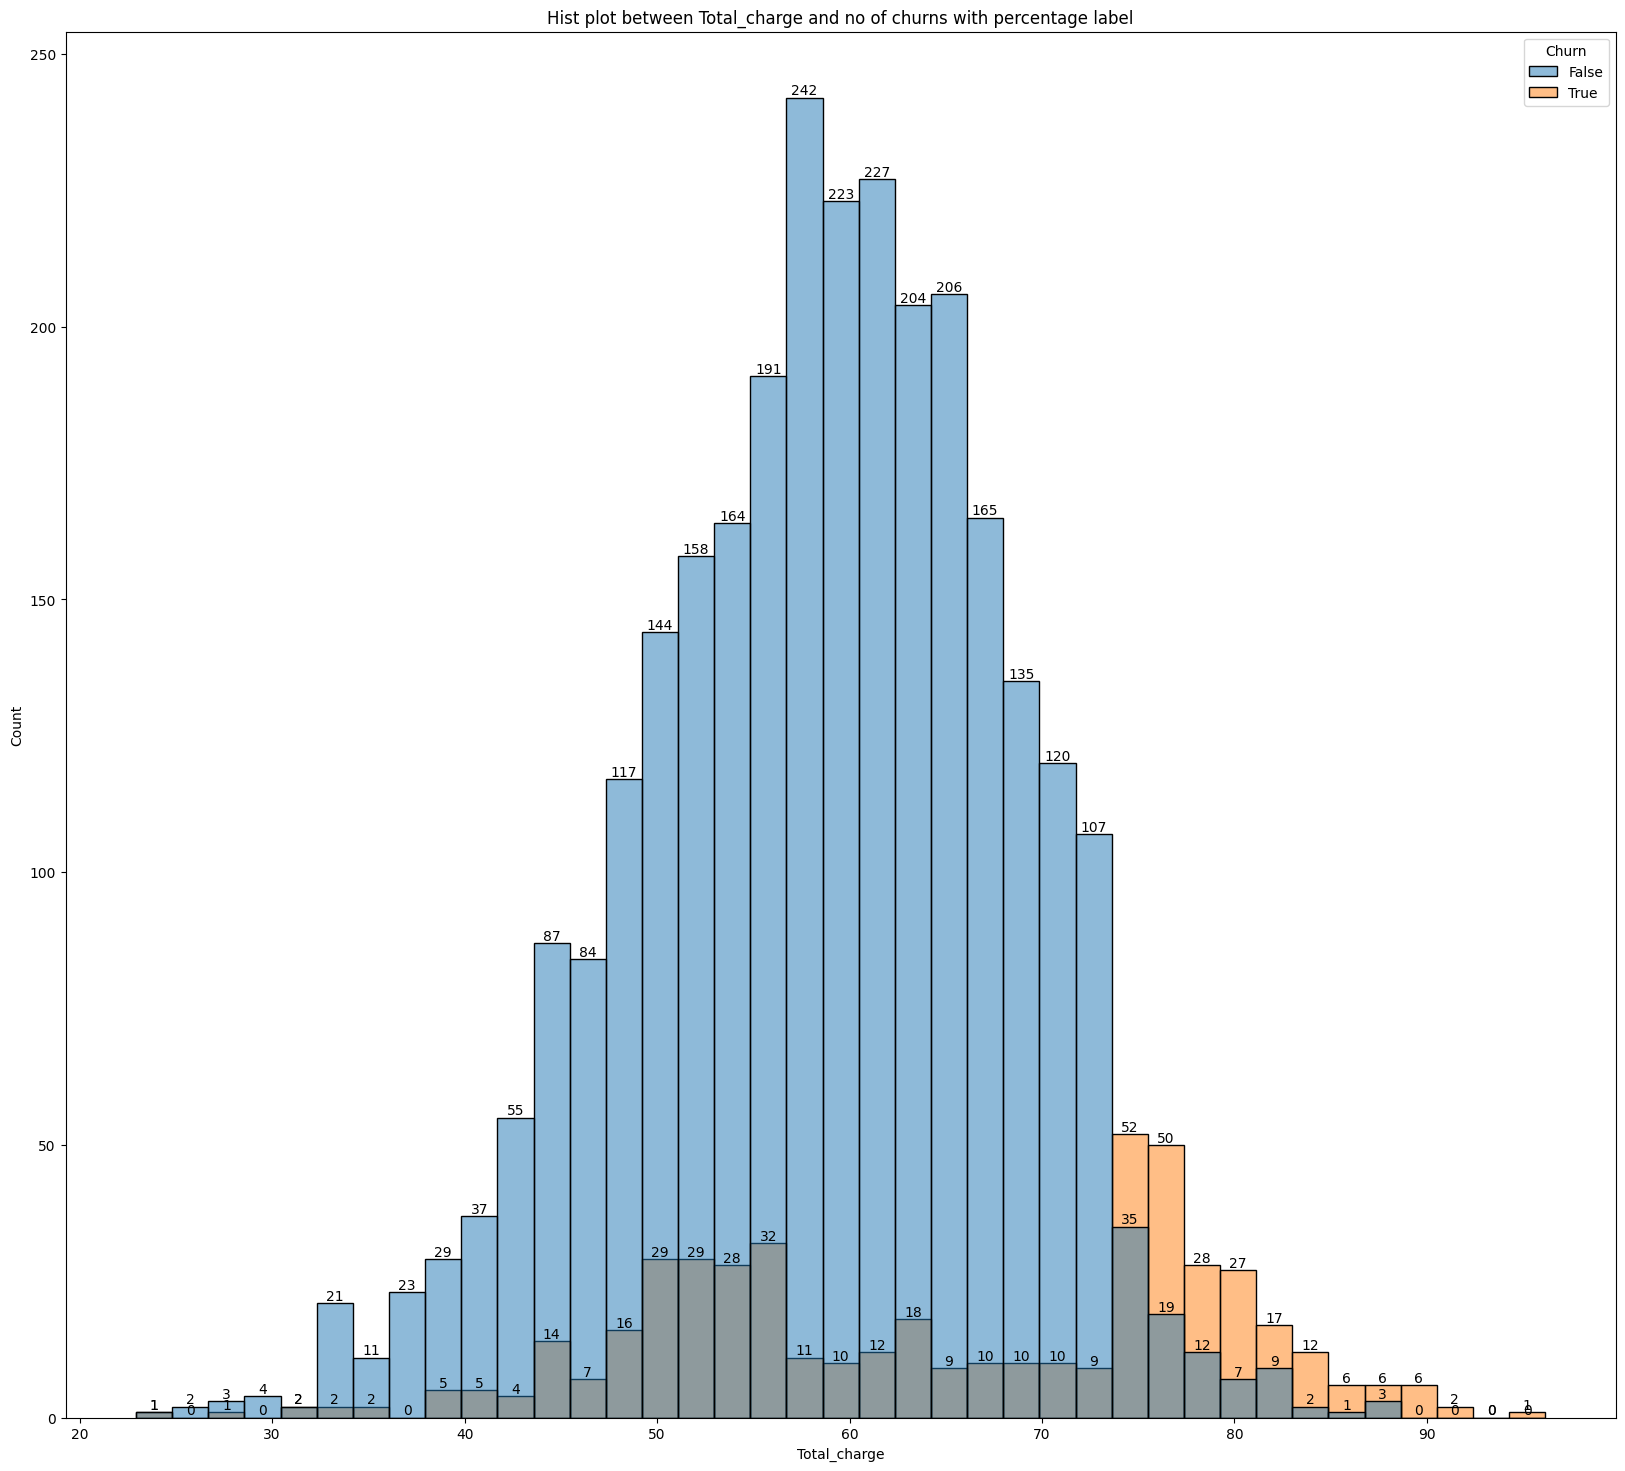

In [ ]:
plt.figure(figsize=(20,18))
ax = sns.histplot(data=df, x="Total_charge", hue="Churn")
plt.title("Hist plot between Total_charge and no of churns with percentage label")
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
#binning the Total_Charge variable in to 4 bins
df['Total_charge_grp'] = pd.cut(df['Total_charge'], 4, labels = ['0','25', '50', '75'])

display("Total_charge_grp:", df.Total_charge_grp.unique())

display(df['Total_charge_grp'])

'Total_charge_grp:'

['50', '25', '75', '0']
Categories (4, object): ['0' < '25' < '50' < '75']

0       50
1       25
2       50
3       50
4       25
        ..
3328    50
3329    50
3330    50
3331    25
3332    50
Name: Total_charge_grp, Length: 3333, dtype: category
Categories (4, object): ['0' < '25' < '50' < '75']

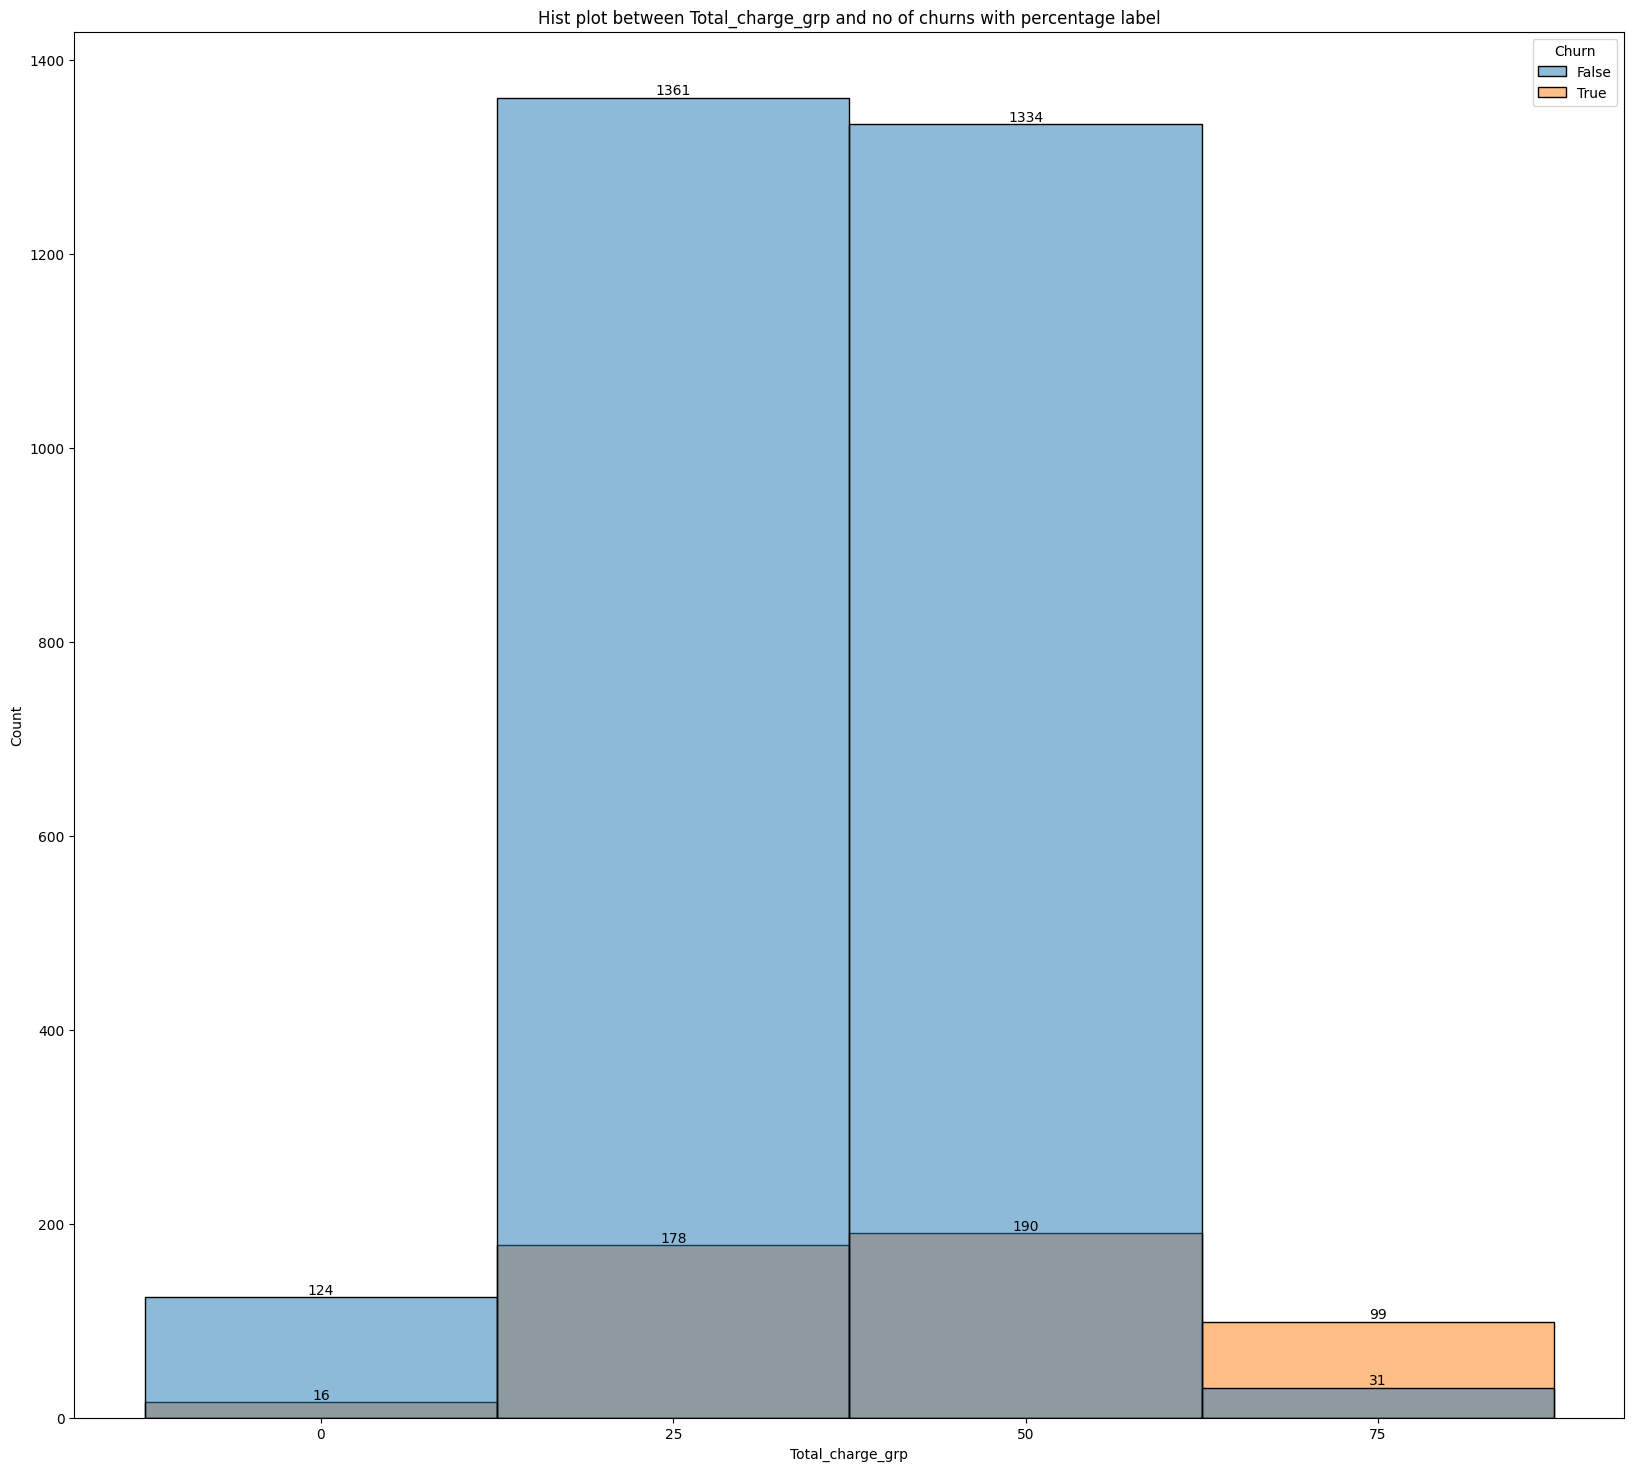

In [ ]:
plt.figure(figsize=(20,18))
ax = sns.histplot(data=df, x="Total_charge_grp", hue="Churn")
plt.title("Hist plot between Total_charge_grp and no of churns with percentage label")
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
# Group by Total_charge and churn
grouped = df.groupby(["Total_charge_grp", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with Total_charge as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="Total_charge_grp", columns="Churn", values="count")

table["Total_charge_grp"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each Total_charge
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True Total_charge_grp  False_%  True_%
3         31    99               75     0.24    0.76
2       1334   190               50     0.88    0.12
1       1361   178               25     0.88    0.12
0        124    16                0     0.89    0.11


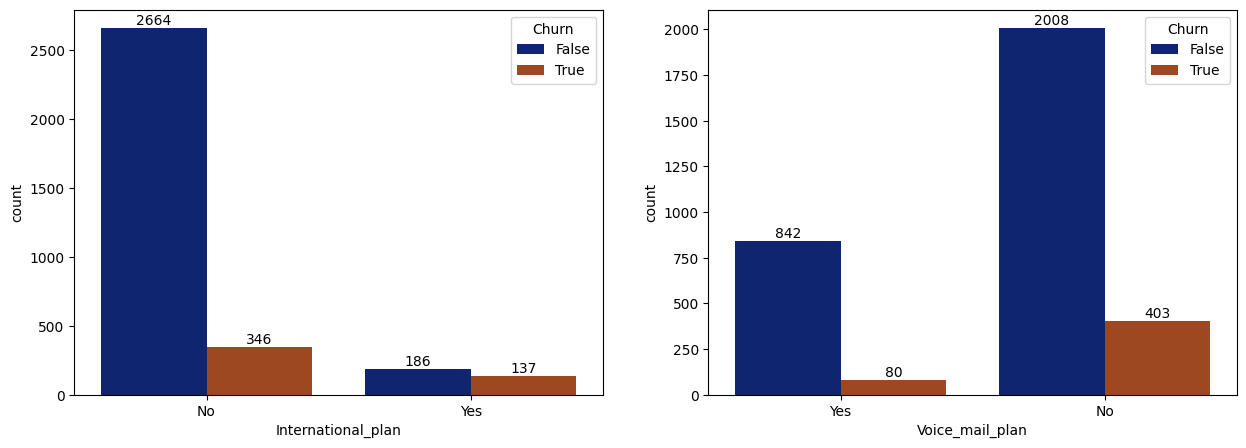

In [ ]:
_, axes = plt.subplots(nrows = 1 , ncols = 2, figsize = (15 , 5))
ax= sns.countplot(x= 'International_plan' , data = df , ax = axes[0], palette= 'dark', hue= 'Churn')
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');

ax= sns.countplot(x= 'Voice_mail_plan' , data = df , ax = axes[1], palette= 'dark', hue= 'Churn')
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
# Group by Voice_mail_plan and churn
grouped = df.groupby(["Voice_mail_plan", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with Voice_mail_plan as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="Voice_mail_plan", columns="Churn", values="count")

table["Voice_mail_plan"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True Voice_mail_plan  False_%  True_%
0       2008   403              No     0.83    0.17
1        842    80             Yes     0.91    0.09


In [ ]:
# Group by International_plan and churn
grouped = df.groupby(["International_plan", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with International_plan as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="International_plan", columns="Churn", values="count")

table["International_plan"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True International_plan  False_%  True_%
1        186   137                Yes     0.58    0.42
0       2664   346                 No     0.89    0.11


42% of the Customers with International_plan have churned.

However only 17% of Customers with a Voice_mail_plan have churned.

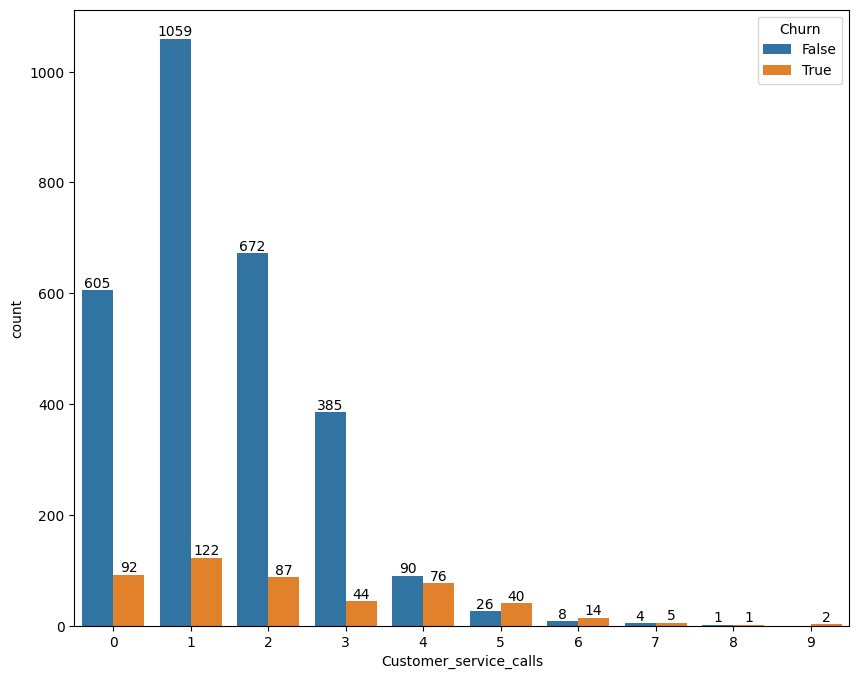

In [ ]:
ax = sns.countplot(df, x = 'Customer_service_calls', hue= 'Churn');
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
# Group by Customer_service_call and churn
grouped = df.groupby(["Customer_service_calls", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with state as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="Customer_service_calls", columns="Churn", values="count")

table["Customer_service_calls"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each state
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn   False   True  Customer_service_calls  False_%  True_%
6        8.00  14.00                       6     0.36    0.64
5       26.00  40.00                       5     0.39    0.61
7        4.00   5.00                       7     0.44    0.56
8        1.00   1.00                       8     0.50    0.50
4       90.00  76.00                       4     0.54    0.46
0      605.00  92.00                       0     0.87    0.13
2      672.00  87.00                       2     0.89    0.11
1     1059.00 122.00                       1     0.90    0.10
3      385.00  44.00                       3     0.90    0.10
9         NaN   2.00                       9      NaN     NaN


The customer who made more than 5 customer service calls has more then 50% churn rate.

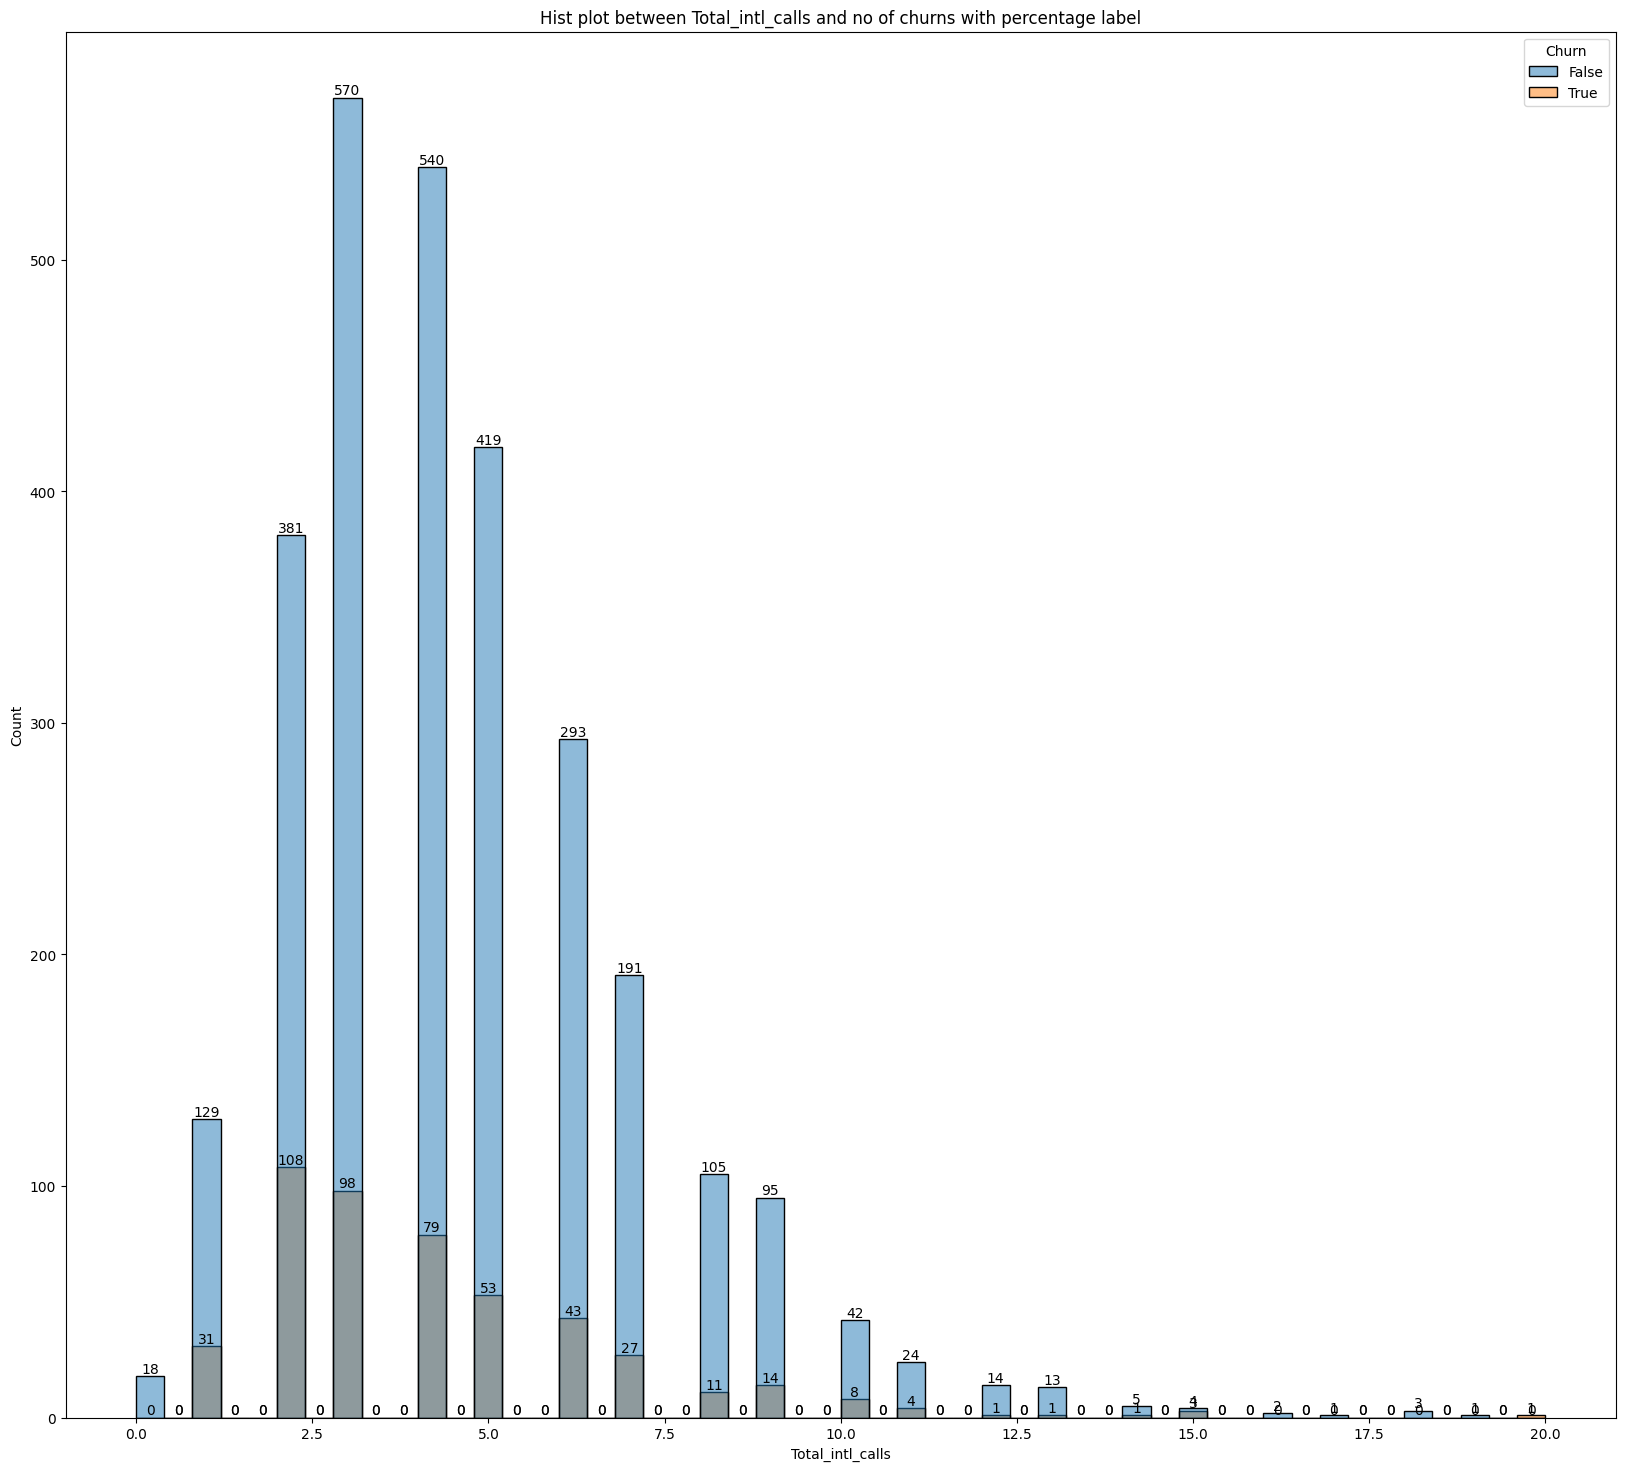

In [ ]:
plt.figure(figsize=(20,18))
ax = sns.histplot(data=df, x="Total_intl_calls", hue="Churn")
plt.title("Hist plot between Total_intl_calls and no of churns with percentage label")
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [ ]:
# Group by Total_intl_calls and churn
grouped = df.groupby(["Total_intl_calls", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with Total_intl_calls as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="Total_intl_calls", columns="Churn", values="count")

table["Total_intl_calls"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each Total_intl_calls
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False   True  Total_intl_calls  False_%  True_%
15      4.00   3.00                15     0.57    0.43
2     381.00 108.00                 2     0.78    0.22
1     129.00  31.00                 1     0.81    0.19
14      5.00   1.00                14     0.83    0.17
10     42.00   8.00                10     0.84    0.16
3     570.00  98.00                 3     0.85    0.15
11     24.00   4.00                11     0.86    0.14
9      95.00  14.00                 9     0.87    0.13
6     293.00  43.00                 6     0.87    0.13
4     540.00  79.00                 4     0.87    0.13
7     191.00  27.00                 7     0.88    0.12
5     419.00  53.00                 5     0.89    0.11
8     105.00  11.00                 8     0.91    0.09
13     13.00   1.00                13     0.93    0.07
12     14.00   1.00                12     0.93    0.07
0      18.00    NaN                 0      NaN     NaN
16      2.00    NaN                16      NaN     NaN
17      1.

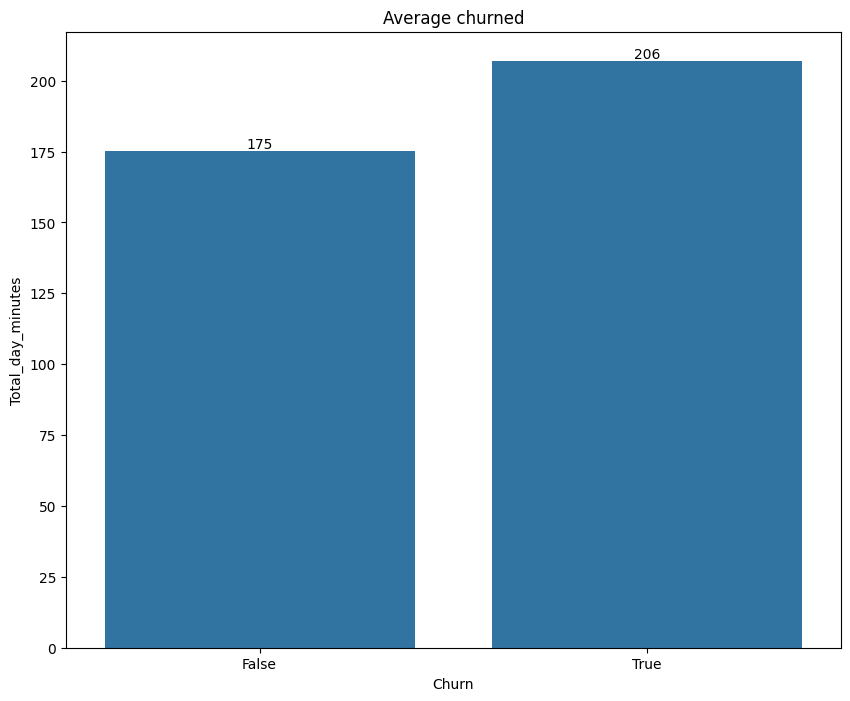

In [ ]:
az = sns.barplot(x="Churn", y="Total_day_minutes", estimator = np.mean, ci=None, data=df)
plt.title('Average churned');
az.bar_label(az.containers[0], fmt = '%d');
#az.bar_label(az.containers[1], fmt = '%d');
#az.bar_label(az.containers[2], fmt = '%d');

Customer who used more Total_day_minutes have churned more.

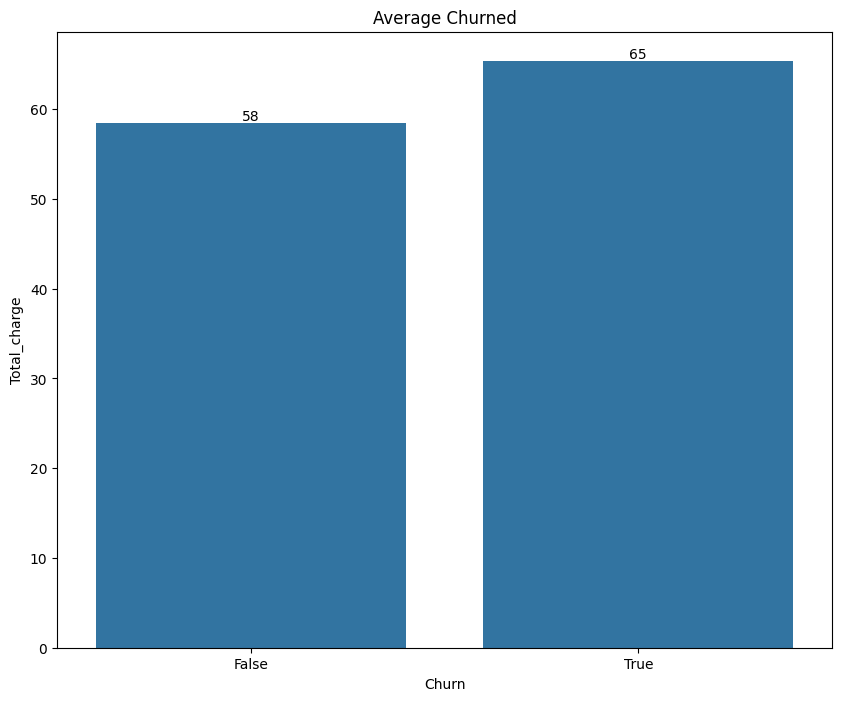

In [ ]:
az = sns.barplot(x="Churn", y="Total_charge", estimator = np.mean, ci=None, data=df)
plt.title('Average Churned');
az.bar_label(az.containers[0], fmt = '%d');

where the total charges are more customers had churned more.

Text(0.5, 1.0, 'Figure:Boxplot of few important features')

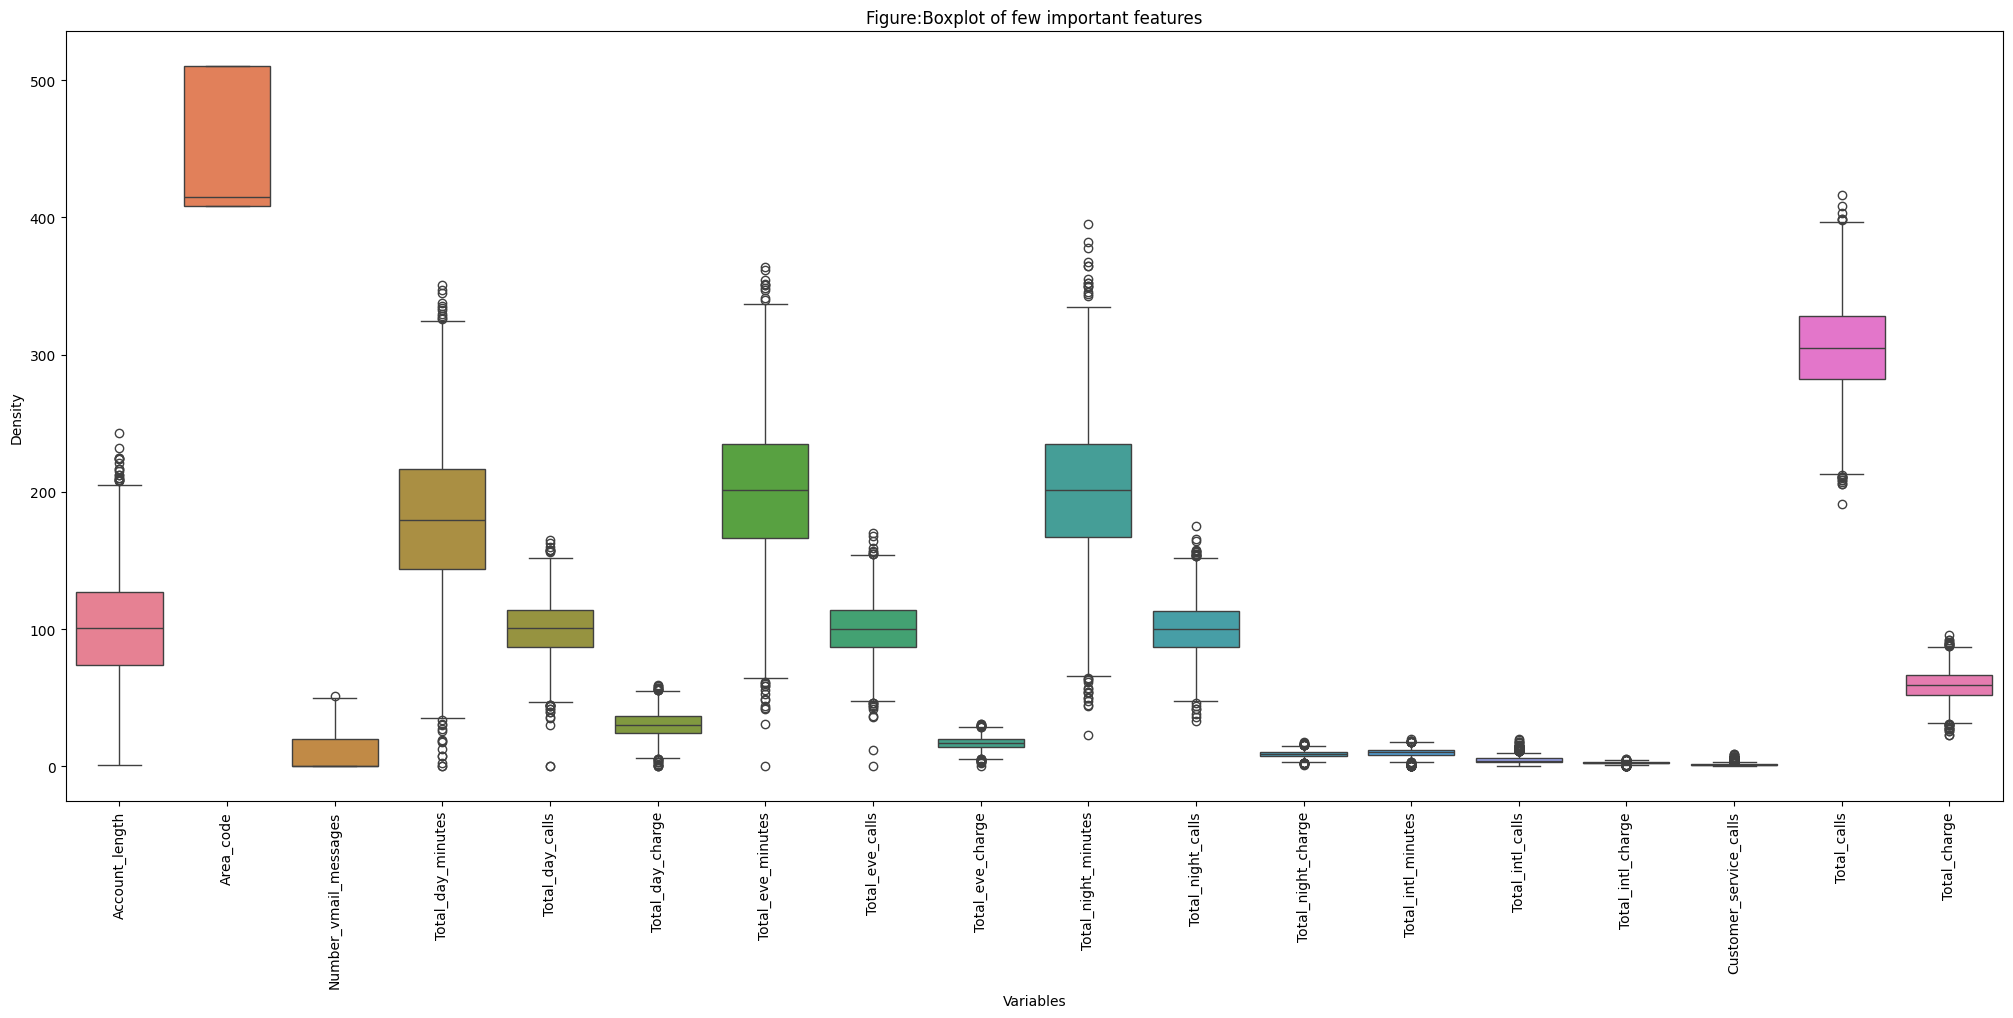

In [ ]:
# Lets check if there are any outliers in the data set
plt.figure(figsize=(25,10))
sns.boxplot(data=df)
plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Density")
plt.title('Figure:Boxplot of few important features')

Almost all the variables have outliers.


Almost all the variables are equially distributed.

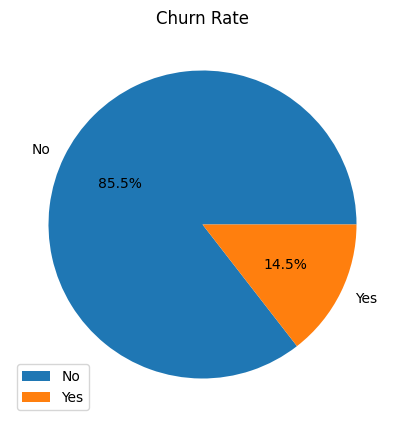

In [ ]:
y=df['Churn'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Churn Rate')
plt.show()

Around 14.5% of customers has been churned acording to the data set.

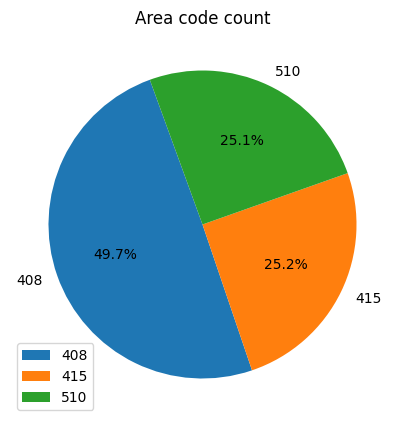

In [ ]:
y=df['Area_code'].value_counts()
plt.figure(figsize=(5,5))
labels=['408','415', '510']
plt.pie(y,labels=labels,autopct='%1.1f%%', startangle=110)
plt.legend(loc='lower left')
plt.title('Area code count')
plt.show()

Most of our users are from area code 408 and somehow equale number of clients in area 510 and 415from count.



In [ ]:
df['Area_code'] = df['Area_code'].astype('int')

Where do most & least of our users come from?

In [ ]:
# Calculate the count of users in each state
state_counts = df['State'].value_counts()

# Get the state with the highest user count
most_common_state = state_counts.idxmax()
most_common_state_count = state_counts.max()

print(f"The state with the most users is: {most_common_state}")
print(f"The number of users in that state is: {most_common_state_count}")

lowest_state = df['State'].value_counts().idxmin()
lowest_state_count = df['State'].value_counts().min()

print(f"The state with the lowest occurrence count is: {lowest_state}")
print(f"The count of occurrences in that state is: {lowest_state_count}")

The state with the most users is: WV
The number of users in that state is: 106
The state with the lowest occurrence count is: CA
The count of occurrences in that state is: 34


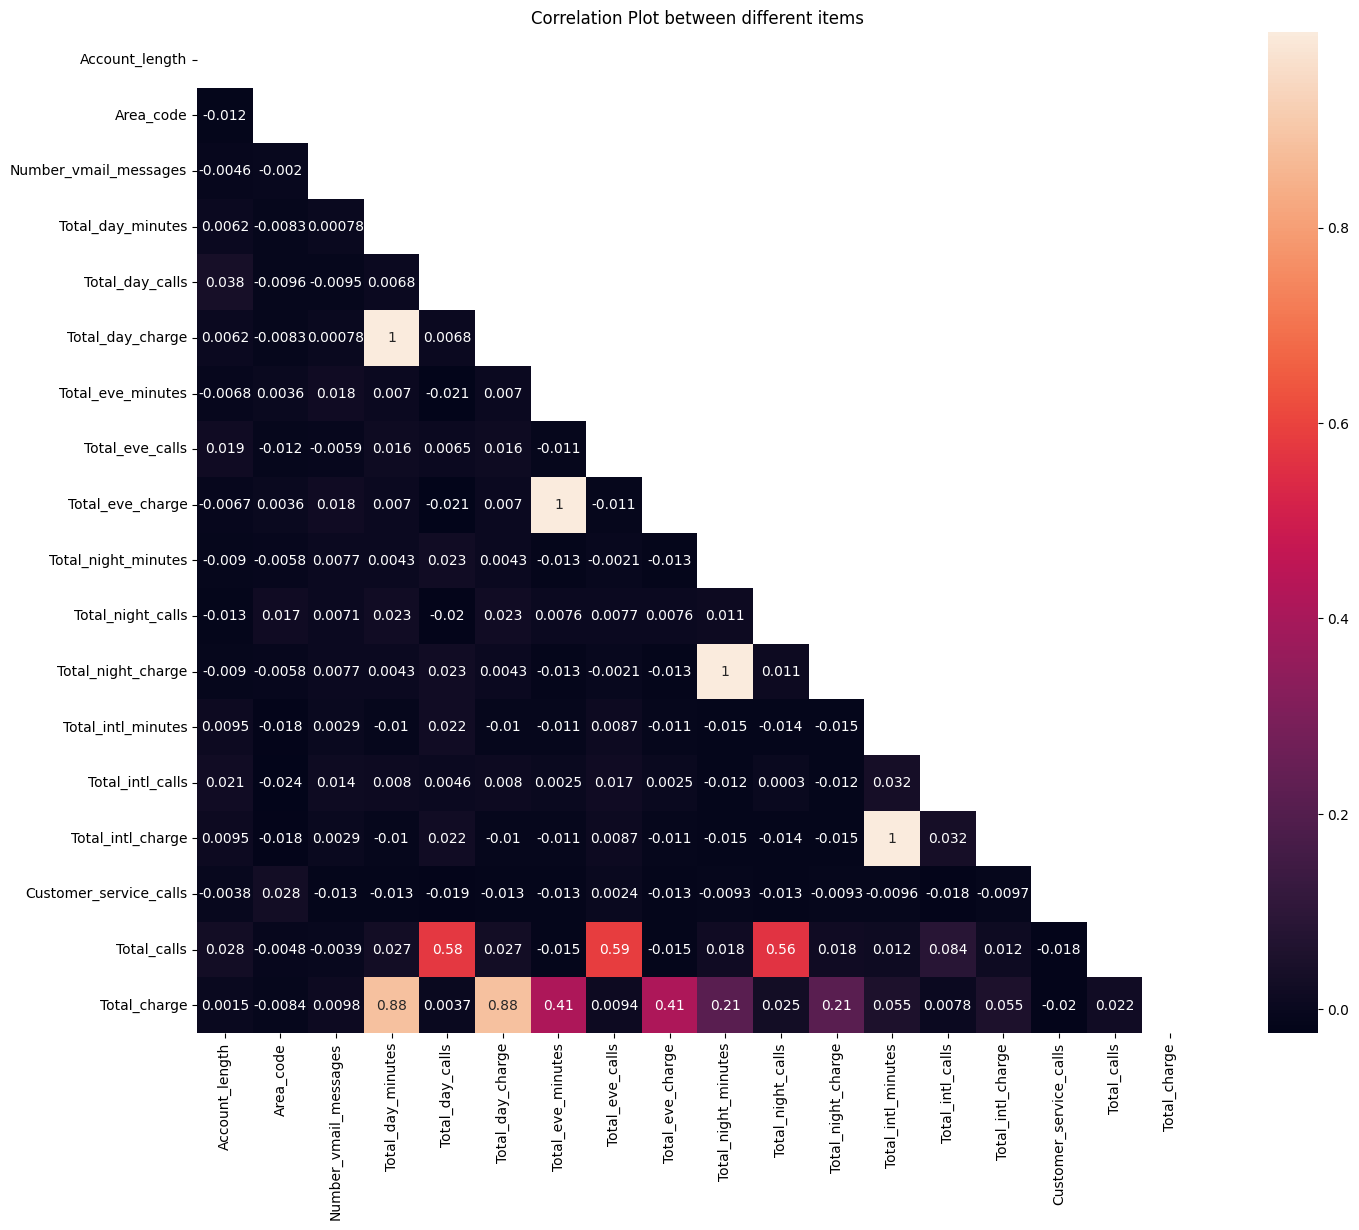

In [ ]:
numeric_data = df.select_dtypes(include=np.number)

plt.figure(figsize=(18, 13))
mask = np.zeros_like(numeric_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=numeric_data.corr(), mask=mask, square=True, annot=True)
plt.title("Correlation Plot between different items")
plt.show()

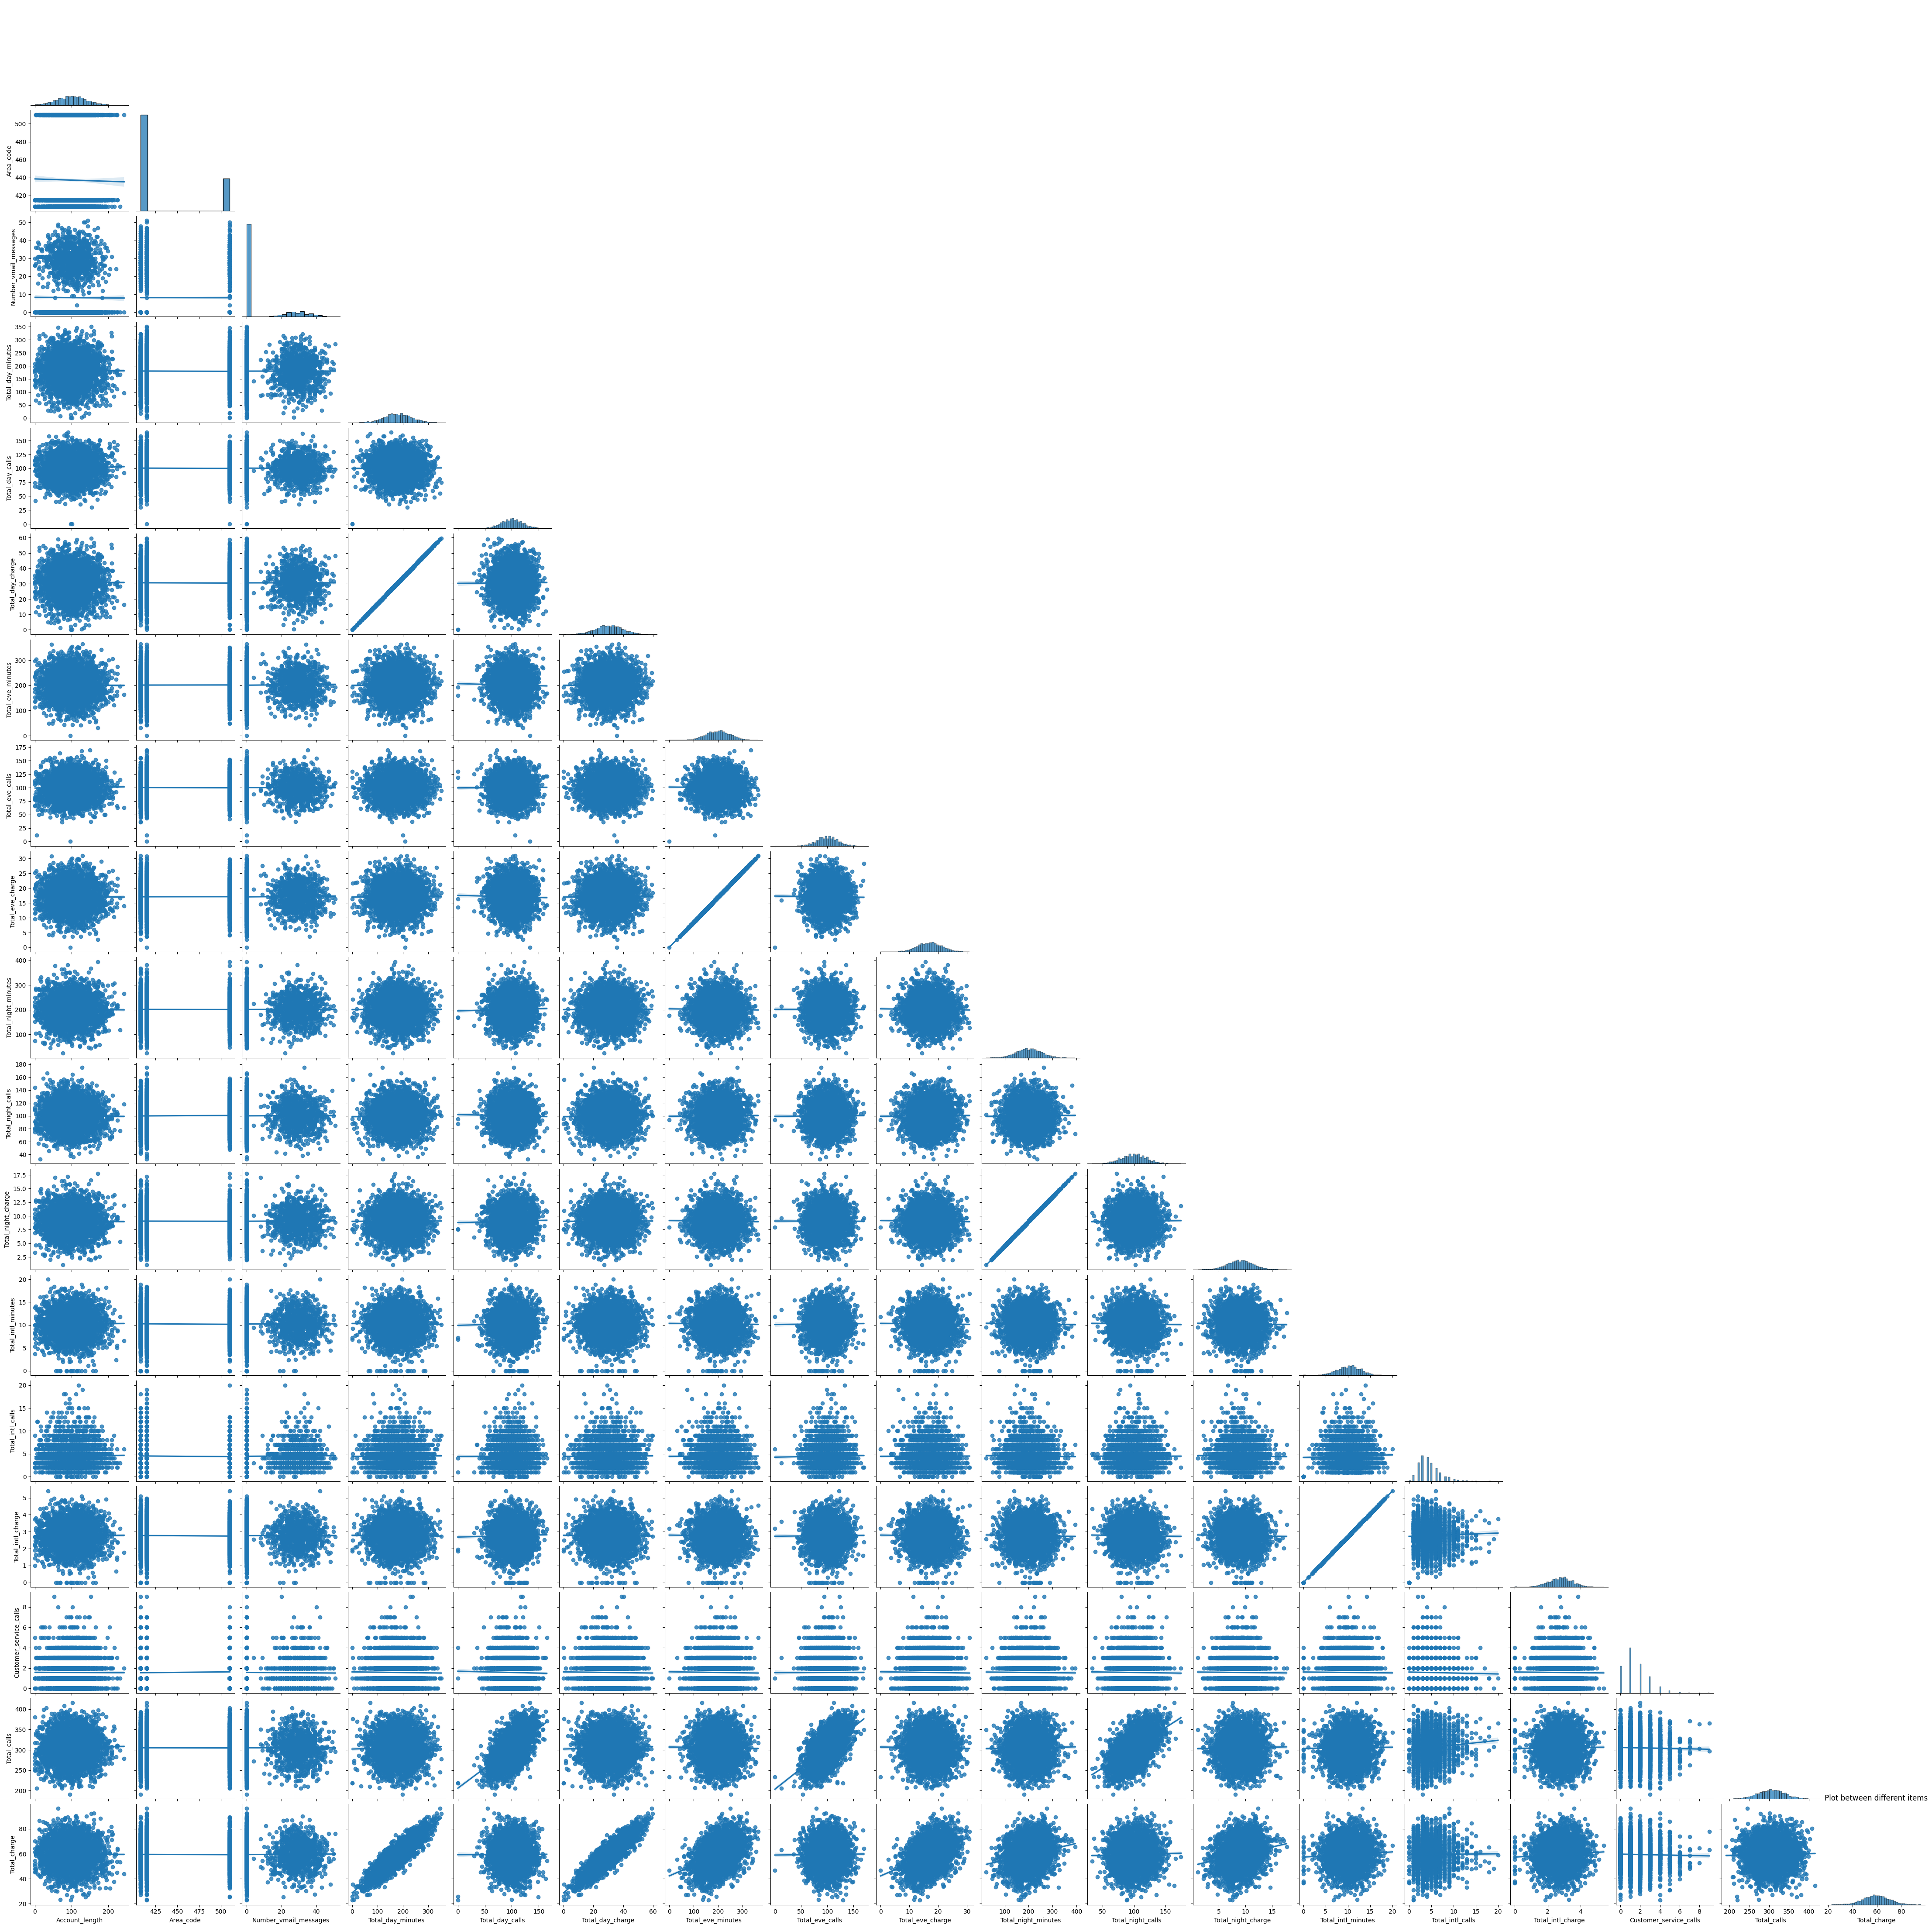

In [ ]:
sns.pairplot(df,corner=True,kind='reg');
plt.title("Plot between different items");

Total day minutes is highly corelated with Total day charge. Total eve minutes is highly corelated with Total eve charge. Total night minutes is highly corelated with Total night charge. Total intl minutes is highly corelated with Total intl charge.

**Conclusion**

I have explored and analyzed the Orange Telecom’s Churn Dataset, which contains 3,333 records of customer activity and churn status. Here is a summary of my findings and recommendations:

The overall churn rate in the dataset is 14.49%, which means that out of 3,333 customers, 483 have canceled their subscription.

The churn rate varies significantly across different customer segments, such as state, area code, international plan, voice mail plan, and customer service calls.

Some of the key factors that are associated with higher churn rates are:

-Having an international plan: Customers with an international plan have a churn rate of 42%, compared to 11% for those without an international plan.

-Making more customer service calls: Customers who make 5 or more customer service calls have a churn rate of 50%, compared to 13% for those who make three or less customer service calls.

-Having a higher total charge: Customers who have a total charge of more than 75 have a churn rate of 76%, compared to 12% for those who have a total charge of less than 50.

Based on these findings, some of the possible ways to reduce customer churn and increase retention are:

* Offering more competitive and flexible international plans that suit the needs and preferences of different customer segments.
* Improving the quality and efficiency of customer service, and providing more proactive and personalized support to customers who face issues or complaints.

* Implementing loyalty programs and incentives that reward customers for their tenure, usage, and referrals, and that encourage them to upgrade or renew their plans.
* To further validate and refine these recommendations, I suggest conducting more in-depth analysis using advanced statistical and machine learning techniques, such as logistic regression, decision trees, or random forests, to identify the most important and predictive features of customer churn, and to build a churn prediction model that can help identify and target customers who are at risk of churning.